In [1]:
import sys
import os
from os.path import dirname, realpath, join
base_dir = dirname(dirname(os.getcwd()))
import itertools
import pandas as pd
from os.path import join
base_dir

sys.path.insert(0, base_dir)
from config_path import PROSTATE_DATA_PATH, PLOTS_PATH, GENE_PATH, PROSTATE_LOG_PATH, BASE_PATH
from data.data_access import Data

In [2]:
import pandas as pd
from os.path import join
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.patches as mpatches
import seaborn as sns

## normalized cell viability

In [ ]:
# normalize by the average 

In [3]:
filename = join(PROSTATE_DATA_PATH, 'functional/revision/KD MDM4 proliferation raw data of 3 experiments in 4 cell lines in triplicates.xls')
df = pd.read_excel(filename, sheet_name='process', header=[0], index_col=None)
del df['Total cells']

In [4]:
df

,cell line,Sample ID,Viable cells
0,C42,sgGFP3,0.40290
1,C42,sgGFP3,0.53750
2,C42,sgGFP3,0.54700
3,C42,sgGFP4,0.57540
4,C42,sgGFP4,0.56590
5,C42,sgGFP4,0.50070
6,C42,sgMDM4-1,0.03791
7,C42,sgMDM4-1,0.05261
8,C42,sgMDM4-1,0.03371
9,C42,sgMDM4-2,0.03371


In [35]:
normalizing_frame = df[df['Sample ID']=='sgGFP3'].groupby(['cell line']).mean()
# ['mean'].to_frame()
normalizing_frame

,Viable cells
cell line,
C42,0.495800
LNCAP,0.161667
LNCAP 95,0.130000
LNCAP Abl,0.028000


In [36]:
normalizing_frame

,Viable cells
cell line,
C42,0.495800
LNCAP,0.161667
LNCAP 95,0.130000
LNCAP Abl,0.028000


In [37]:
normalized_df = df.join(normalizing_frame, on=['cell line'], rsuffix = '_base')
normalized_df['Normalized Viable cells'] = normalized_df['Viable cells']/normalized_df['Viable cells_base']
normalized_df
# normalized_df['Normalized Cell Count'] = normalized_df['Viable cells']/normalized_df['Viable cells']

,cell line,Sample ID,Viable cells,Viable cells_base,Normalized Viable cells
0,C42,sgGFP3,0.40290,0.495800,0.812626
1,C42,sgGFP3,0.53750,0.495800,1.084107
2,C42,sgGFP3,0.54700,0.495800,1.103267
3,C42,sgGFP4,0.57540,0.495800,1.160549
4,C42,sgGFP4,0.56590,0.495800,1.141388
5,C42,sgGFP4,0.50070,0.495800,1.009883
6,C42,sgMDM4-1,0.03791,0.495800,0.076462
7,C42,sgMDM4-1,0.05261,0.495800,0.106111
8,C42,sgMDM4-1,0.03371,0.495800,0.067991
9,C42,sgMDM4-2,0.03371,0.495800,0.067991


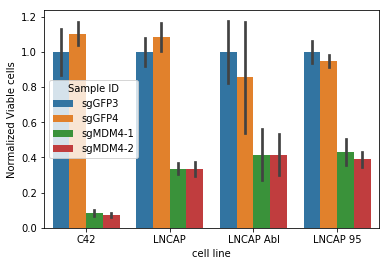

In [38]:
sns.barplot(x="cell line", y="Normalized Viable cells", hue="Sample ID", data=normalized_df, ci='sd');

## original

In [4]:
dd= df.groupby(['cell line','Sample ID']).agg([np.mean, np.std])
dd.columns= dd.columns.droplevel(0)
dd=dd.reset_index()
dd


,cell line,Sample ID,mean,std
0,C42,sgGFP3,0.495800,0.080594
1,C42,sgGFP4,0.547333,0.040664
2,C42,sgMDM4-1,0.041410,0.009924
3,C42,sgMDM4-2,0.035777,0.006549
4,LNCAP,sgGFP3,0.161667,0.015825
5,LNCAP,sgGFP4,0.175400,0.015762
6,LNCAP,sgMDM4-1,0.054343,0.005991
7,LNCAP,sgMDM4-2,0.053977,0.008041
8,LNCAP 95,sgGFP3,0.130000,0.010000
9,LNCAP 95,sgGFP4,0.123333,0.005774


In [5]:
dd= dd.set_index('cell line')
normalizing_frame = dd[dd['Sample ID']=='sgGFP3']['mean'].to_frame()
normalizing_frame.columns=['normalize']
normalizing_frame
normalized_df = dd.join(normalizing_frame)
normalized_df['Normalized Cell Count'] = normalized_df['mean']/normalized_df['normalize']
normalized_df

,Sample ID,mean,std,normalize,Normalized Cell Count
cell line,,,,,
C42,sgGFP3,0.495800,0.080594,0.495800,1.000000
C42,sgGFP4,0.547333,0.040664,0.495800,1.103940
C42,sgMDM4-1,0.041410,0.009924,0.495800,0.083522
C42,sgMDM4-2,0.035777,0.006549,0.495800,0.072159
LNCAP,sgGFP3,0.161667,0.015825,0.161667,1.000000
LNCAP,sgGFP4,0.175400,0.015762,0.161667,1.084948
LNCAP,sgMDM4-1,0.054343,0.005991,0.161667,0.336144
LNCAP,sgMDM4-2,0.053977,0.008041,0.161667,0.333876
LNCAP 95,sgGFP3,0.130000,0.010000,0.130000,1.000000


sgGFP3
sgGFP4
sgMDM4-1
sgMDM4-2


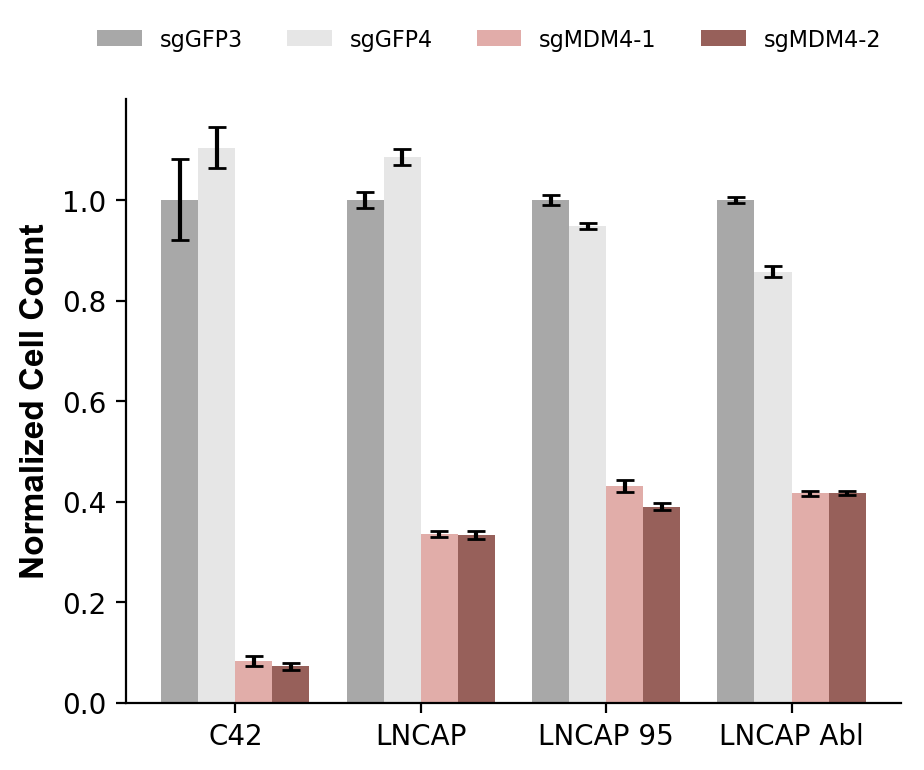

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

colors={
    'sgGFP3':'#848484', 
 'sgGFP4':'#DCDCDC', 
 'sgMDM4-1':'#D58A85',
 'sgMDM4-2':'#6B1D14', 
    
}
def grouped_barplot(df, cat,subcat, val , err):
    u = df[cat].unique()
    x = np.arange(len(u))
    subx = df[subcat].unique()
    offsets = (np.arange(len(subx))-np.arange(len(subx)).mean())/(len(subx)+1.)
    width= np.diff(offsets).mean()
    
#     current_palette = sns.color_palette("Paired")
#     colors = {}
#     for i, gr in enumerate(subx):
#         if i>1:
#             colors[gr] =current_palette[i+4]
#         else:
#             colors[gr] =current_palette[i+8]
    
    for i,gr in enumerate(subx):
        print gr
        dfg = df[df[subcat] == gr]
        plt.bar(x+offsets[i], dfg[val].values, width=width, 
                label="{}".format( gr), yerr=dfg[err].values, capsize=3.2, color=colors[gr], alpha=0.7)
#     plt.xlabel(cat)
    plt.ylabel(val, fontdict=dict(family='Arial', weight='bold', fontsize=12) )
    plt.xticks(x, u)
    plt.legend(framealpha=0.0, bbox_to_anchor=(1., 1.15), ncol=4, prop={'size': 8})
    

cat = "cell line"
subcat = "Sample ID"
val = "Normalized Cell Count"
err = "std"
fig, ax = plt.subplots(nrows=1, ncols=1, sharey=True, figsize=(5,4), dpi=200)
grouped_barplot(normalized_df.reset_index(), cat, subcat, val, err )
# plt.legend( framealpha=0.0, loc='upper center', ncol=4, prop={'size': 6})
# plt.ylim(0,1.5)
# plt.show()
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig('CRISPR', dpi=200)